# Lab 5.05 - Two-sample t-test

In [2]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import math

## Exercise 5 - Comparing test results between groups

A large number of students participated in a test that was organized in several successive sessions. Because creating a separate test for each session was practically unfeasible, the same questions were used in each session. Consequently, there is a danger that students could pass on information about the test to the groups that still had to come after. Later groups then have an advantage over the first. However, this also evident from the test scores?

The file `test-results.csv` contains all results of the test. The score is a floating point number with maximum 40. If the score field is empty, this indicates a student that was absent. Each session is identified by a letter, in the order of the consecutive sessions.

- Day 1: sessions A, B
- Day 2: sessions C, D, E
- Day 3: sessions F, G, H

Sessions A and B were conducted on a different campus, so it could be assumed that there is little to no communication with students from other sessions.

If information was passed on successfully, we expect the scores of later groups to be significantly better than the first.

**Note** that the reverse reasoning does not necessarily hold: if it turns out that the result of later sessions is indeed significantly better, this does not necessarily mean that the (only) cause is passing on of information. There may also be other causes (e.g. “weaker” class groups happen to be scheduled earlier).

1. Explore the data. Calculate the appropriate measures for central tendency and dispersion for the full dataset and for each session individually.
2. Plot a bar graph of the average score per session with error bars denoting one standard deviation.
3. Make a box plot of the scores divided per group. Compare the sessions listed below. Do you think there is a significant difference between the results? Can we suspect that information has been passed on?
    - A and B
    - C, D and E
    - F, G and H
    - C and H
    - A and H
4. Use an appropriate statistical test to determine whether the differences between the groups listed above are also *significant*. Can we conclude that the later groups score better or not?

In [3]:
scoresdf = pd.read_csv("../data/test-results.csv")
scoresdf.head()
scoresdf.dropna()

,Session,Score
0,A,12.5
1,A,7.5
3,A,21.0
4,A,10.0
5,A,20.5
...,...,...
198,H,22.0
199,H,26.5
200,H,22.5
201,H,22.0


In [27]:
def groepgem(groep):
  gem = scoresdf[scoresdf['Session'] == groep]['Score'].mean()
  return gem

groepen = scoresdf['Session'].unique()
avgScores = {}

for groep in groepen:
  print(f"{groep} : {groepgem(groep):.4f}")
  avgScores[groep] = groepgem(groep)

groupavg = scoresdf['Score'].mean()
groupstd = scoresdf['Score'].std()
print(f"Average of whole group: {groupavg:.4f}")
print(f"Std of whole group: {groustd:.4f}")
  

A : 13.1176
B : 17.2143
C : 18.8000
D : 22.4519
E : 18.8523
F : 17.8148
G : 18.7362
H : 20.9464
Average of whole group: 18.7890
Std of whole group: 7.0140


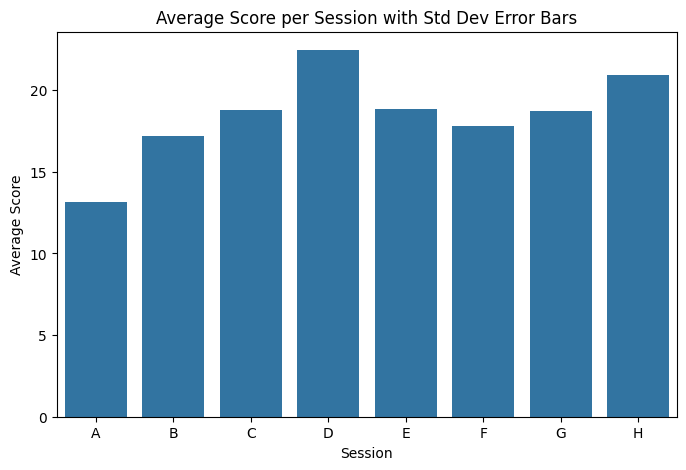

In [32]:
avg_df = pd.DataFrame(list(avgScores.items()), columns=['Session', 'AverageScore'])
stds = scoresdf.groupby('Session')['Score'].std().reindex(avg_df['Session']).values

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_df, x='Session', y='AverageScore', capsize=0.2)
plt.ylabel('Average Score')
plt.title('Average Score per Session with Std Dev Error Bars')
plt.show()

### Answers

The average score in each session was:

| Session | Average score |
| :-----: | :------------ |
|    A    | 13.1          |
|    B    | 17.2          |
|    C    | 18.8          |
|    D    | 22.5          |
|    E    | 18.9          |
|    F    | 17.8          |
|    G    | 18.7          |
|    H    | 20.9          |

The table below shows the p-value of a one-sided t-test of two samples between the given sessions:

| Alt. hypothesis                       | p-value   |
| :------------------------------------ | :-------- |
| $\overline{x}_A - \overline{x}_B < 0$ | 0.05356   |
| $\overline{x}_C - \overline{x}_D < 0$ | 0.01343   |
| $\overline{x}_E - \overline{x}_D < 0$ | 0.02356   |
| $\overline{x}_F - \overline{x}_H < 0$ | 0.05767   |
| $\overline{x}_G - \overline{x}_H < 0$ | 0.1156    |
| $\overline{x}_C - \overline{x}_H < 0$ | 0.1463    |
| $\overline{x}_A - \overline{x}_H < 0$ | 0.0003289 |

Remarks:

- The difference between **session A and B**, although it seems quite large, is insignificant for $\alpha = 0.05$
- **Sessions C, D and E**:
  - Session D had the highest score. Sessions C and E had similar results, at least the average score was similar.
  - Session D has a significantly higher score than either sessions C and E. However, session E came _after_ D, so the cause is definitely not the passing of information.
- The differences between **sessions F, G and H** insignificant
- **Sessions C and H** are respectively the first and the last session on the same campus. So, if there is an opportunity to pass on information about the test, there's definitely enough time between these two sessions. However, the difference is not significant!
- The difference between **sessions A and H** are significant, but since they took place on different campuses, it is questionable that this difference is caused by passing on information.